In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import GPy

X = 1.0*np.arange(0,4,2)[:,None]
X = np.c_[X+2,X,X]
#X[0:50,2]=0
#X[50:,2]=1
X[:,2]=0
Y = np.sin(X[:,0:1]/4.0)+np.random.randn(len(X),1)*0.1
k = GPy.kern.Mix_Integral_(3,lengthscale=[2.5],variance=[0.1])
krbf = GPy.kern.RBF(1)
m = GPy.models.GPRegression(X,Y,k)
m2 = GPy.models.GPRegression(X[:,0:1],Y,krbf)
m.Gaussian_noise = 0.01

In [11]:
testX = np.linspace(-4,14,100)
testX = np.c_[testX,np.ones([len(testX),2])]
preds, covs = m.predict_noiseless(testX,full_cov=True)
samples = np.random.multivariate_normal(preds[:,0],covs,100)

(0, 10)

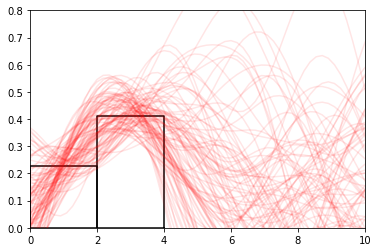

In [12]:
#m.plot_noiseless(plot_limits=[-4,14],fixed_inputs=[(1,0),(2,1)],plot_data=False)
for x,y in zip(X,Y):
    h = y/(x[0]-x[1])
    plt.plot(x[[0,0,1,1,0]],[0,h,h,0,0],'k-')
plt.ylim([0,0.8])
plt.plot(testX[:,0],samples.T,'r-',alpha=0.1);
plt.xlim([0,10])

In [13]:
m2.checkgrad(verbose=True)

                   Name                   |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
--------------------------------------------------------------------------------------------------------------------------
 GP_regression.rbf.variance               |   1.000000    |   0.000000    |   0.244935    |   0.244935    |     2e-07     
 GP_regression.rbf.lengthscale            |   1.000000    |   0.000000    |   -0.039089   |   -0.039089   |     3e-08     
 GP_regression.Gaussian_noise.variance    |   1.000000    |   0.000000    |   0.254707    |   0.254707    |     2e-07     


True

In [4]:
m.checkgrad(verbose=True)

                    Name                    |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
----------------------------------------------------------------------------------------------------------------------------
 GP_regression.mix_integral_.variance       |   1.000000    |   0.000000    |   -0.110773   |   -0.110773   |     1e-07     
 GP_regression.mix_integral_.lengthscale    |   1.000000    |   0.000000    |   -0.244456   |   -0.244456   |     3e-07     
 GP_regression.Gaussian_noise.variance      |   1.000000    |   0.000000    |   0.017657    |   0.017657    |     2e-08     


True

In [5]:
from GPy.testing.kernel_tests import Kern_check_dK_dX, check_kernel_gradient_functions

In [39]:
Z = 1.0*np.array([[5,2]]).T
print(krbf.gradients_X(np.array([[1.0]]),Z,X))
check_kernel_gradient_functions(krbf,Z,X[:,0:1],verbose=True)

[[-0.76776456]
 [ 0.48713856]]
Checking covariance function is positive definite.
Check passed.
Checking gradients of K(X, X) wrt theta.
                 Name                 |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
----------------------------------------------------------------------------------------------------------------------
 kernel_test_model.rbf.variance       |   1.000000    |   0.000000    |   -1.127633   |   -1.127633   |     1e-06     
 kernel_test_model.rbf.lengthscale    |   1.000000    |   0.000000    |   -0.182221   |   -0.182221   |     2e-07     
Check passed.
Checking gradients of K(X, X2) wrt theta.
                 Name                 |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
----------------------------------------------------------------------------------------------------------------------
 kernel_test_model.rbf.variance       |   1.000000    |   0.000000    |   -0.902725   |   -0.

True

In [42]:
Zdelta = Z.copy()
delta = 0.0001
Zdelta[0,0]+=delta
np.sum((krbf.K(Z,X[:,0:1])-krbf.K(Zdelta,X[:,0:1]))/delta,1)

array([0.79846595, 0.        ])

In [41]:
krbf.gradients_X(np.array([1.0]),Z,X[:,0:1])

array([[-0.79846561],
       [ 0.52406275]])

In [46]:
Z = 1.0*np.array([[5,0,1],[2,0,1]])
print(k.gradients_X(np.array([[1.0]]),Z,X))
#Kern_check_dK_dX(k,X=Z,X2=X,f)#.checkgrad(verbose=True)
check_kernel_gradient_functions(k,Z,X,fixed_X_dims=[2],verbose=True)

Running gradients_X
[[-0.68328206]
 [ 0.        ]]
[[-0.68328206  0.          0.        ]
 [ 0.          0.          0.        ]]
Checking covariance function is positive definite.
Check passed.
Checking gradients of K(X, X) wrt theta.
                      Name                      |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
--------------------------------------------------------------------------------------------------------------------------------
 kernel_test_model.mix_integral_.variance       |   1.000000    |   0.000000    |   -0.626816   |   -0.626816   |     1e-06     
 kernel_test_model.mix_integral_.lengthscale    |   1.000000    |   0.000000    |   -0.023613   |   -0.023613   |     4e-08     
Check passed.
Checking gradients of K(X, X2) wrt theta.
                      Name                      |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
---------------------------------------------------------------

AssertionError: 

In [55]:
Zdelta = Z.copy()
delta = 0.0001
Zdelta[0,0]+=delta
np.sum((k.K(Z,X)-k.K(Zdelta,X))/delta,1)

array([0.61301405, 0.        ])

In [56]:
k.gradients_X(np.array([2.0]),Z,X)

Running gradients_X
[[-1.22611127]
 [ 0.        ]]


array([[-1.22611127,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [59]:
Xdelta = X.copy()
delta = 0.0001
Xdelta[0,0]+=delta
(k.K(Z,X)-k.K(Z,Xdelta))/delta

array([[-0.00269609,  0.        ],
       [-1.20811063,  0.        ]])